# <span style='color:OrangeRed'>V8 - Regelung im Zustandsraum</span>

## <span style='color:Gray'>Beispiel #1 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das System:
<br>    $A$ = $\left[ \begin{array}{rrrr}
           1 & 1  \\
          -2 & -1  \\
          \end{array}\right] $
<br><br>    $B$ =  $\left[ \begin{array}{rrrr}
           0   \\
           1   \\
          \end{array}\right] $
<br><br>    $C$ =  $\left[ \begin{array}{rrrr}
           1 & 0  \\
           \end{array}\right] $
<br><br>    $D$ = $0$ .


Zunächst prüfen wir die Steuerbarkeit des Systems über den Rang der Steuerbarkeitsmatrix:
<br><br>    $S_c$ =  $\left[ \begin{array}{rrrr}
           B & AB  \\
           \end{array}\right] $ = $\left[ \begin{array}{rrrr}
           0 & 1  \\
          1 & -1  \\
          \end{array}\right] {\Rightarrow} Rang~S_c  = 2$  

In [1]:
pkg load control

In [2]:
A = [1 1;
    -2   -1];

B = [0; 1];

C = [1 0];

D = 0;

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Prüfe die Steuerbarkeit mittels Rang-Funktion:

In [3]:
disp('Steuerbarkeit des System');
S_c = [B  A*B]
rank(S_c)

Steuerbarkeit des System
S_c =

   0   1
   1  -1

ans =  2


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir sehen, wie erwartet, dass der Rang der Matrix 2 ergibt.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Im nächsten Schritt ermitteln wir die Eigenwerte des offenen Regelkreises:


In [4]:
disp('Eigenwerte');
eigs(A)

Eigenwerte
ans =

  -0.00000 + 1.00000i
  -0.00000 - 1.00000i



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das offene System ist grenzstabil mit den Eigenwerten: $p_{1} = 0+j$ , $p_{2} = 0-j$ 
<br><br>Gebe nun für den geschlossenen Regelkreis diese zwei Pole vor, sodass eine Verschiebung in die linke Halbebene erfolgt:

In [5]:
disp('Regler');
pd = [-3+1j*3  -3-1j*3]
F = place(A,B,pd)

Regler
pd =

  -3 + 3i  -3 - 3i

F =

   23.0000    6.0000



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
So erhalten wir ein stabiles System.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zur Veranschaulichung bilden wir zunächst dem folgenden Simulinkmodell nach. Wir fangen mit dem offenen Regelkreis <span style='color:Red'>A</span>  an:

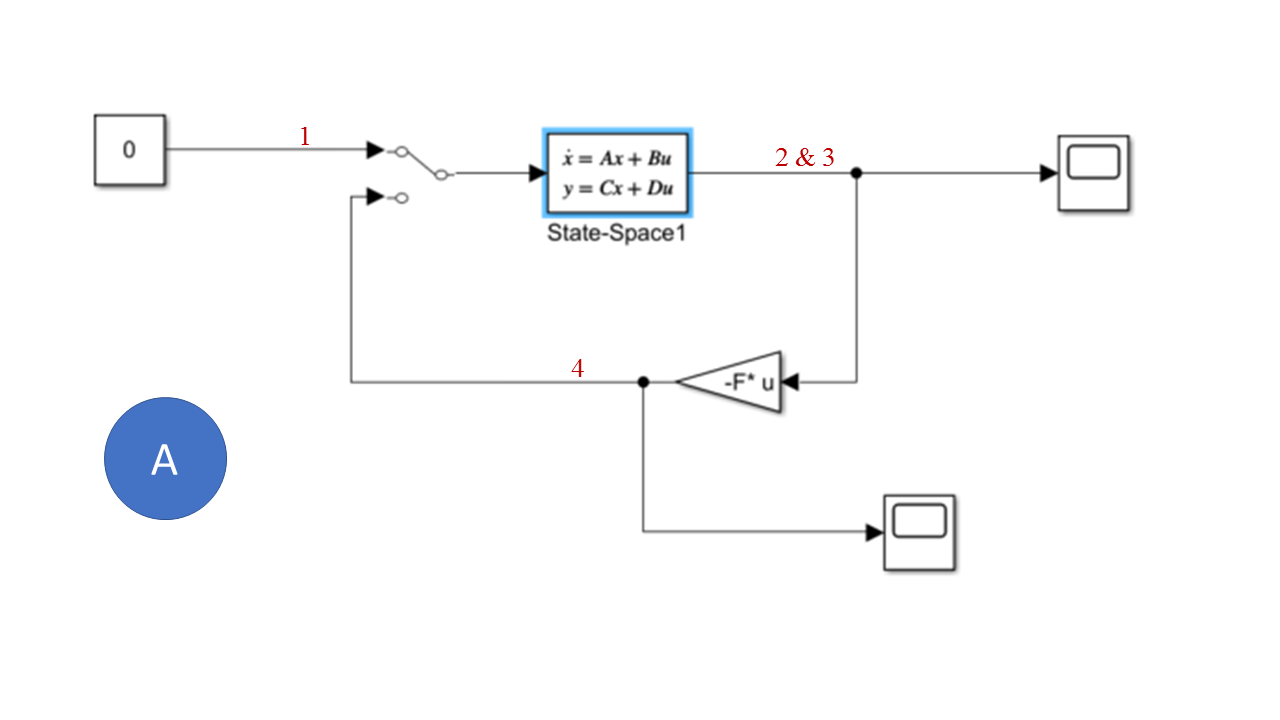

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das System hat den Eingang Null, so erwarten wir an dieser Stelle im nächsten Schritt die homogene Lösung.

In [7]:
% Simulink model A
% Set the Octave Engine to run the simulation
% Simulation Parameters
addpath("./Octsim");
% Start time
tini = 0;
% End time
tfinal = 10;
% Time Step
dt = 0.01;
% Number of data flows in the schematic
nflows = 4;
% Initial conditions
xo = [2; 2];

C2 = eye(2);

% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br> List of components:
<br><br><span style='color:Orange'>Constant Function Definition:</span>
    <br><code>Constant(1.argument = Output_1, 2.argument = constant value)</code>

In [8]:
c1{1} = Constant(1,0);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br><span style='color:Orange'>StateSpace Function Definition:</span>
<br><code>StateSpace(1.argument = input_1, 2.argument= output_2 & output_3, 3.argument= A, 4.argument=  B, 5.argument= initial conditions x0)

In [9]:
c1{2} = StateSpace(1,[2 3],A,B,C2,D,xo);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br><span style='color:Orange'>Gain Function Definition:</span>
<br><code>Gain(1.argument = input_2 & input_3, 2.argument = output_4, 3.argument= gain value)

In [10]:
c1{3} = Gain([2 3],4,-F); 

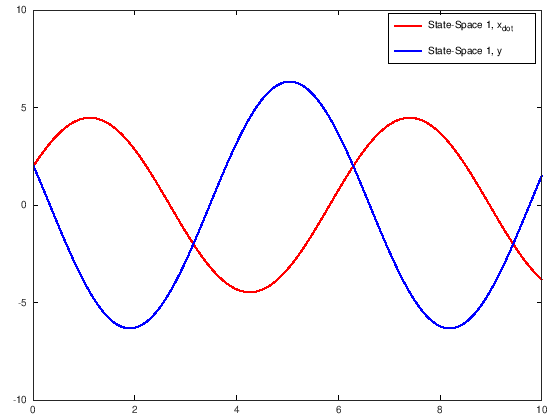

In [11]:
sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([2 3 4]);
plot(out1(1,:),out1(2,:),'r','LineWidth',4 ,out1(1,:),out1(3,:), 'b','LineWidth',4); %Output Signal 1 & 2
legend('State-Space 1, x_{dot}','State-Space 1, y')

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wie beim grenzstabilen System zu erwarten, erkennen wir eine perfekte Oszillation.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Hier betrachten wir den Verlauf unseres des Verstärkerelements F:

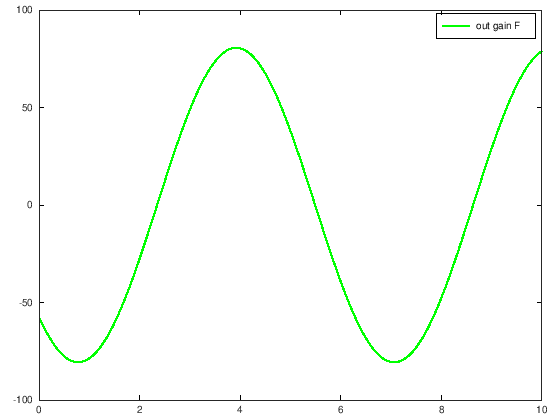

In [12]:
plot(out1(1,:),out1(4,:),'g','LineWidth',4); % Output_4
legend('out gain F')

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Im nächsten Schritt schließen wir den Regelkreis:

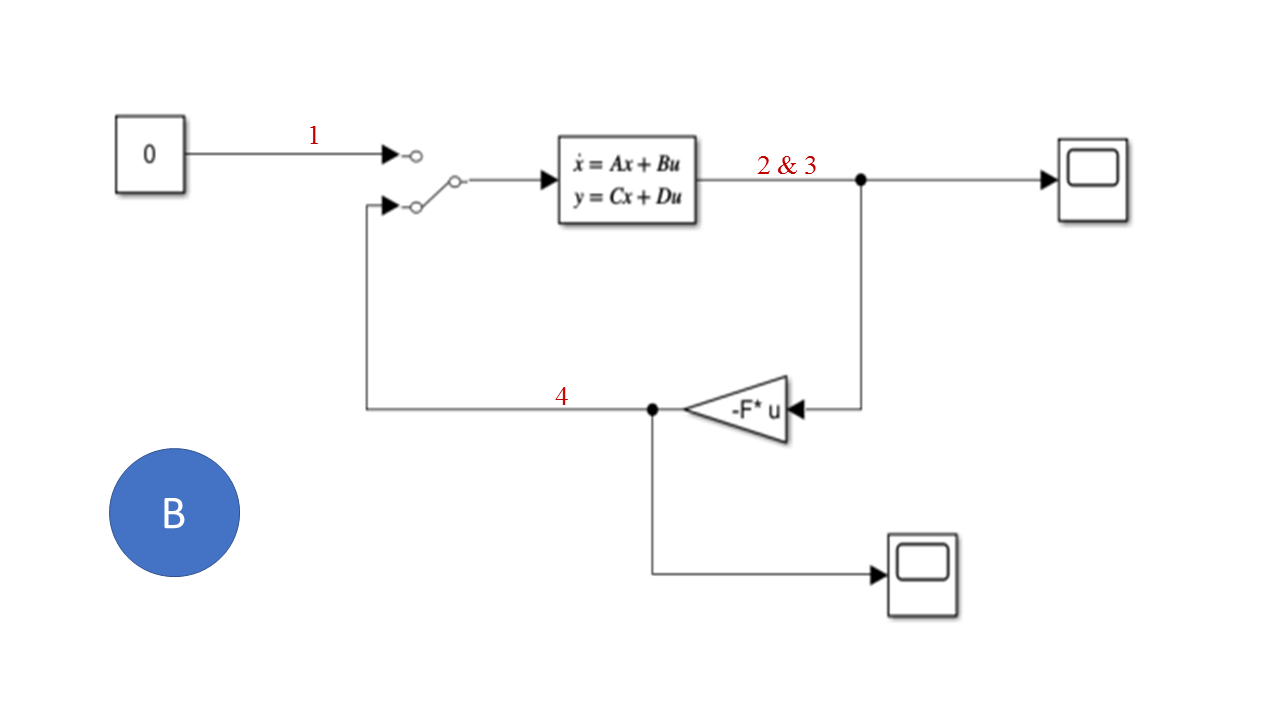

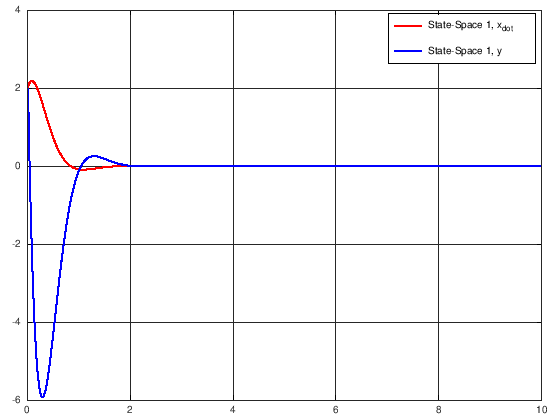

In [13]:
% Matrices
C2 = eye(2);

% Instance of the simulation schematic
sc2 = Schema(tini,tfinal,dt,nflows);

% List of components
c2{1} = Constant(1,0); %Just for reference for plotting graph, not being used here.
c2{2} = StateSpace(4,[2 3],A,B,C2,D,xo);
c2{3} = Gain([2 3],4,-F); 

sc2.AddListComponents(c2);

% Run the schematic and plot
out2 = sc2.Run([2 3 4]);
plot(out2(1,:),out2(2,:),'r','LineWidth',4 ,out2(1,:),out2(3,:), 'b','LineWidth',4); %Output Signal 1 & 2
legend('State-Space 1, x_{dot}','State-Space 1, y')
grid on

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun sehen wir, dass innerhalb von 2 Sekunden das System in den stabilen Zustand übergeht.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wieder betrachten wir den Verlauf am Verstärkerelement F:

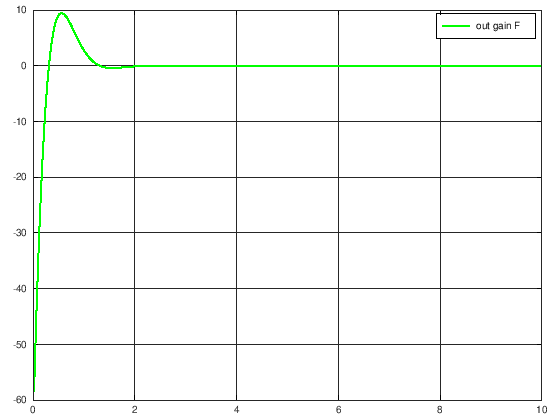

In [14]:
plot(out2(1,:),out2(4,:),'g','LineWidth',4); % Output_4
legend('out gain F')
grid on


## <span style='color:Gray'>Beispiel #2 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das System aus <span style='color:Gray'>Beispiel #1</span>.

In [15]:
A = [1 1;
    -2   -1];

B = [0; 1];

C = [1 0];

D = 0;

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun möchten wir die Regelgröße fixieren. Im stationären Zustand soll nun die Regelgröße der Führungsgröße entsprechen. Hierfür ermitteln wir den Vorfilter $V$ mit: <br> $V$ =  $[C(BF-A)^{-1}B]^{-1}$   

In [16]:
disp('Steuerbarkeit des System');
W = [B  A*B]
rank(W)

Steuerbarkeit des System
W =

   0   1
   1  -1

ans =  2


In [17]:
disp('Eigenwerte');
eigs(A)

Eigenwerte
ans =

  -0.00000 + 1.00000i
  -0.00000 - 1.00000i



In [18]:
disp('Regler');
pd = [-3+1j*3  -3-1j*3]
F = place(A,B,pd)

Regler
pd =

  -3 + 3i  -3 - 3i

F =

   23.0000    6.0000



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Als Eingang wird in Simulink der Einheitssprung gewählt. Wir fügen nun den Vorfilter V als Gain Komponente ein:

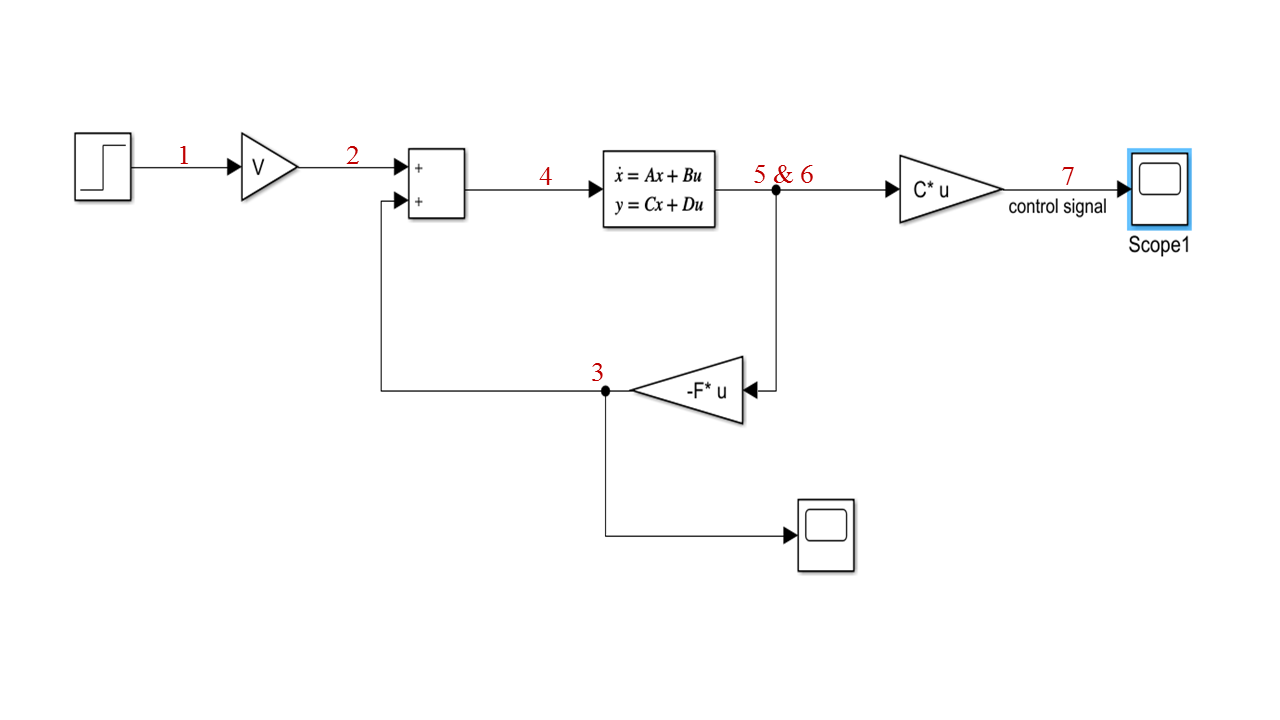

In [19]:
V = inv(C*inv(B*F-A)*B)

V =  18.000


In [20]:
% Number of data flows in the schematic
nflows2 = 6;

C2 = eye(2);

% Instance of the simulation schematic
sc3 = Schema(tini,tfinal,dt,nflows2);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br> List of components:


In [21]:
c3{1} = StepSource(1,0,1,1);
c3{2} = Gain(1,2,V);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br><span style='color:Orange'>Sum Function Definition:</span>
<br><code>Sum(1.argument = input_2, 2.argument = input_3, 3.argument = output_4, 4.argument = first sign , 5.argument = second sign )</code>

In [22]:
c3{3} = Sum(2,3,4,1,1); 

In [23]:
c3{4} = StateSpace(4,[5 6],A,B,C2,D,xo);
c3{5} = Gain([5 6],3,-F);
c3{6} = Gain([5 6],7,[0 1]);

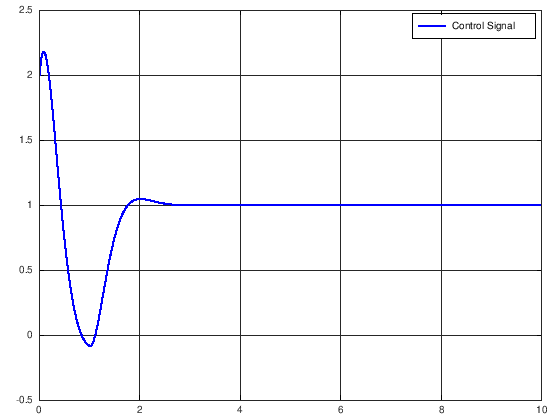

In [24]:
sc3.AddListComponents(c3);

% Run the schematic and plot
out3 = sc3.Run([3 5 6]);
plot(out3(1,:),out3(3,:),'b','LineWidth',4);
legend('Control Signal')
grid on

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das Ergebnis zeigt, dass im stationären Zustand die Regelgröße der Führungsgröße entspricht

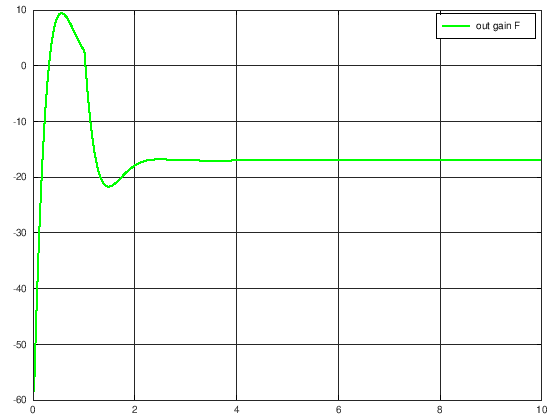

In [25]:
plot(out3(1,:),out3(2,:),'g','LineWidth',4); % Output_3
legend('out gain F')
grid on

## <span style='color:Gray'>Beispiel #3  </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das bekannte System aus der Vorlesung:
<br>    $A$ = $\left[ \begin{array}{rrrr}
           -1 & 0 & 0  \\
            1 & -2 & 0  \\
            0 & 5 & 0   \\
          \end{array}\right] $   
<br><br>    $B$ =  $\left[ \begin{array}{rrrr}
           1  \\
           0   \\
           0   \\
          \end{array}\right] $

In [26]:
A = [-1 0 0;
    1 -2 0;
    0  5 0];

B = [1; 0; 0];

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst ermitteln wir die Steuerbarkeitsmatrix:

In [27]:
disp('Steuerbarkeit Matrix')
S_c = [B A*B A*A*B]

Steuerbarkeit Matrix
S_c =

   1  -1   1
   0   1  -3
   0   0   5



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Es wird lediglich die letzte Reihe (n=3) der inversen Steuerbarkeitsmatrix betrachtet ($s_{c_{n}}^T$):

In [28]:
S_c_inv = inv(S_c)
s_c_n = S_c_inv(3,:)

S_c_inv =

   1.00000   1.00000   0.40000
   0.00000   1.00000   0.60000
   0.00000   0.00000   0.20000

s_c_n =

   0.00000   0.00000   0.20000



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Da die Inverse ausgegeben werden kann, ist dies ein Beweis dass das System steuerbar ist, denn die Determinante ist ungleich Null.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun wird die Polvorgabe durchgeführt:

In [29]:
disp('Pole Vorgabe')
disp('p1 = -2, p2,3= -1+/-J')
P = [4 6 4 1]
p1 = -2
p2 = -1+1j
p3 = -1-1j

v1 = s_c_n
v2 = s_c_n*A
v3 = s_c_n*A*A
v4 = s_c_n*A*A*A

Pole Vorgabe
p1 = -2, p2,3= -1+/-J
P =

   4   6   4   1

p1 = -2
p2 = -1 + 1i
p3 = -1 - 1i
v1 =

   0.00000   0.00000   0.20000

v2 =

   0   1   0

v3 =

   1  -2   0

v4 =

  -3   4   0



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun wird die Polvorgabe durchgeführt:

In [30]:
F2 = place(A,B,[p1 p2 p3]) % Nach Polvergabe ist F2 = F

F2 =

   1.00000   2.00000   0.80000



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

$f^T = p_{0}s_{c_{n}}^{T} + p_{1}s_{c_{n}}^{T}A +  p_{1}s_{c_{n}}^{T}A^2 + p_{1}s_{c_{n}}^{T}A^3$

In [31]:
F = (P(1)*v1+P(2)*v2+P(3)*v3+P(4)*v4) % Rückführfaktor

F =

   1.00000   2.00000   0.80000



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Polvorgabe erfolgte durch die Wahl der charakteristischen Gleichung:
<br> $P(s) = 4 + 6s + 4s^2 + s^3 $
<br> Damit erhält man schließlich den Rückführvektor:
<br> $f^T$ =  $4 \left[ \begin{array}{rrrr}
             0 & 0  & \frac{1}{5}  \\
           \end{array}\right]
            +  6 \left[ \begin{array}{rrrr}
             0 & 1  & 0  \\
           \end{array}\right]
          + 4 \left[ \begin{array}{rrrr}
             1 & -2  & 0  \\
           \end{array}\right]
          + 6 \left[ \begin{array}{rrrr}
             -3 & 4  & 0  \\
           \end{array}\right]$
<br><br> $f^T$ = $6 \left[ \begin{array}{rrrr}
             1 & 2  & \frac{4}{5}  \\
           \end{array}\right]$

## <span style='color:Gray'>Beispiel #4  </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das System:

In [33]:
A1 = [1 0; 0 -1]
B1 = [1; 0]
C1 = eye(2)
D1 = [0; 0]

A1 =

   1   0
   0  -1

B1 =

   1
   0

C1 =

Diagonal Matrix

   1   0
   0   1

D1 =

   0
   0



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das offene System ist instabil und nicht steuerbar!

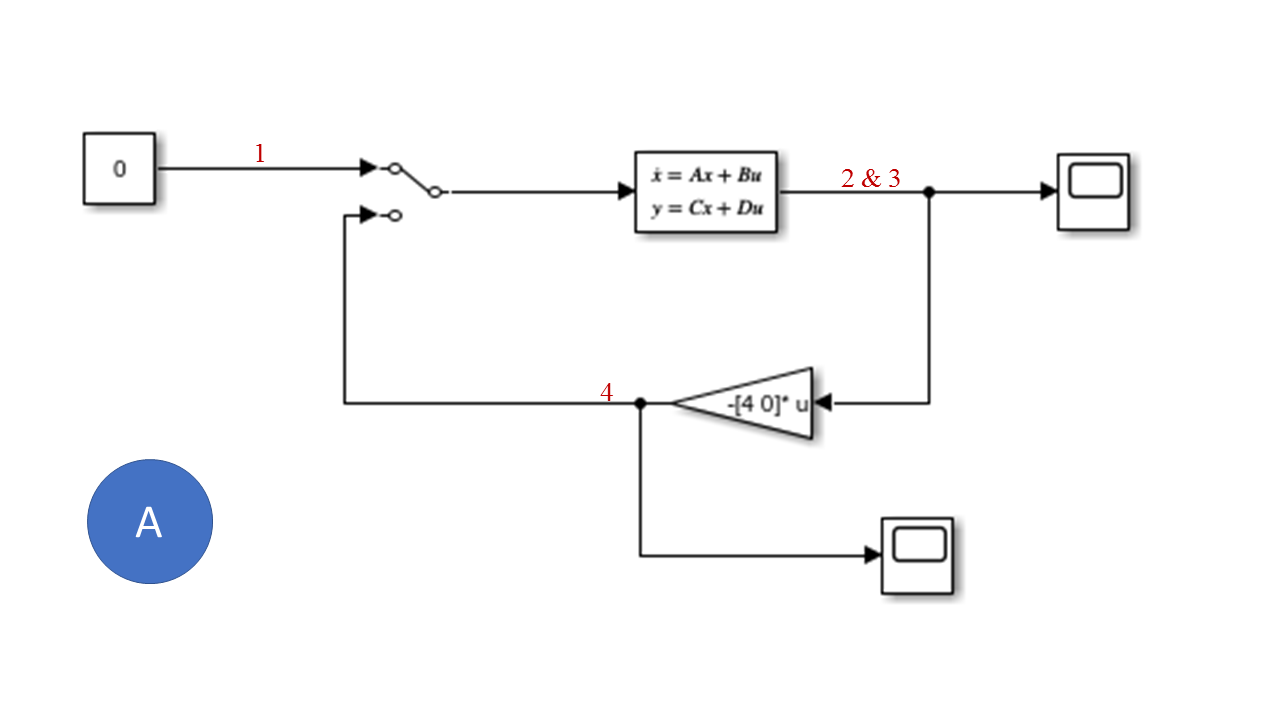

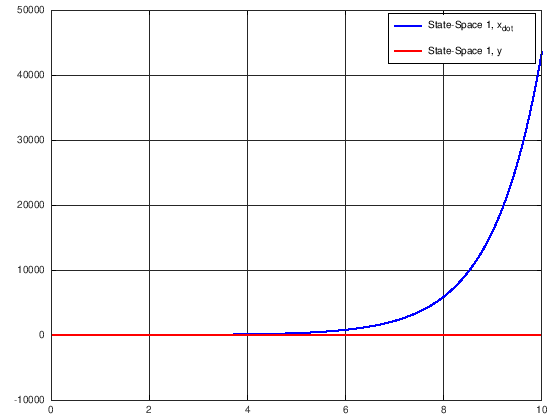

In [34]:
% Simulink model A
% Set the Octave Engine to run the simulation
% Simulation Parameters
% Start time
tini = 0;
% End time
tfinal = 10;
% Time Step
dt = 0.01;
% Number of data flows in the schematic
nflows = 4;

% Initial conditions
xo = [2; 2];



% Instance of the simulation schematic
sc4 = Schema(tini,tfinal,dt,nflows);

% List of components
c4{1} = Constant(1,0);
c4{2} = StateSpace(1,[2 3],A1,B1,C1,D1,xo);
c4{3} = Gain([2 3],4,-[4 0]); 

sc4.AddListComponents(c4);

% Run the schematic and plot
out4 = sc4.Run([2 3 4]);
plot(out4(1,:),out4(2,:),'b','LineWidth',4, out4(1,:),out2(3,:),'r','LineWidth',4);
legend('State-Space 1, x_{dot}','State-Space 1, y')
grid on

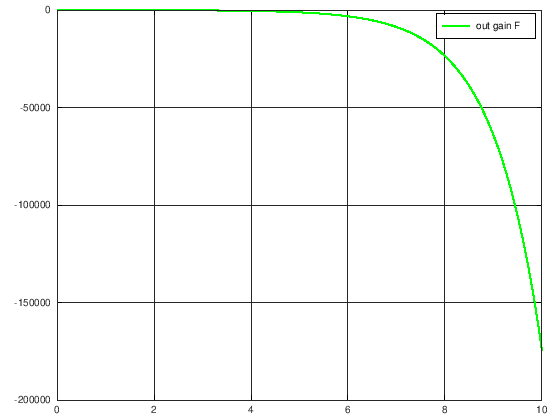

In [35]:
plot(out4(1,:),out4(4,:),'g','LineWidth',4); % Output_4
legend('out gain F')
grid on

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Der erste Pol kann also mittels $F_1$  verschoben werden, sodass das System stabil wird!

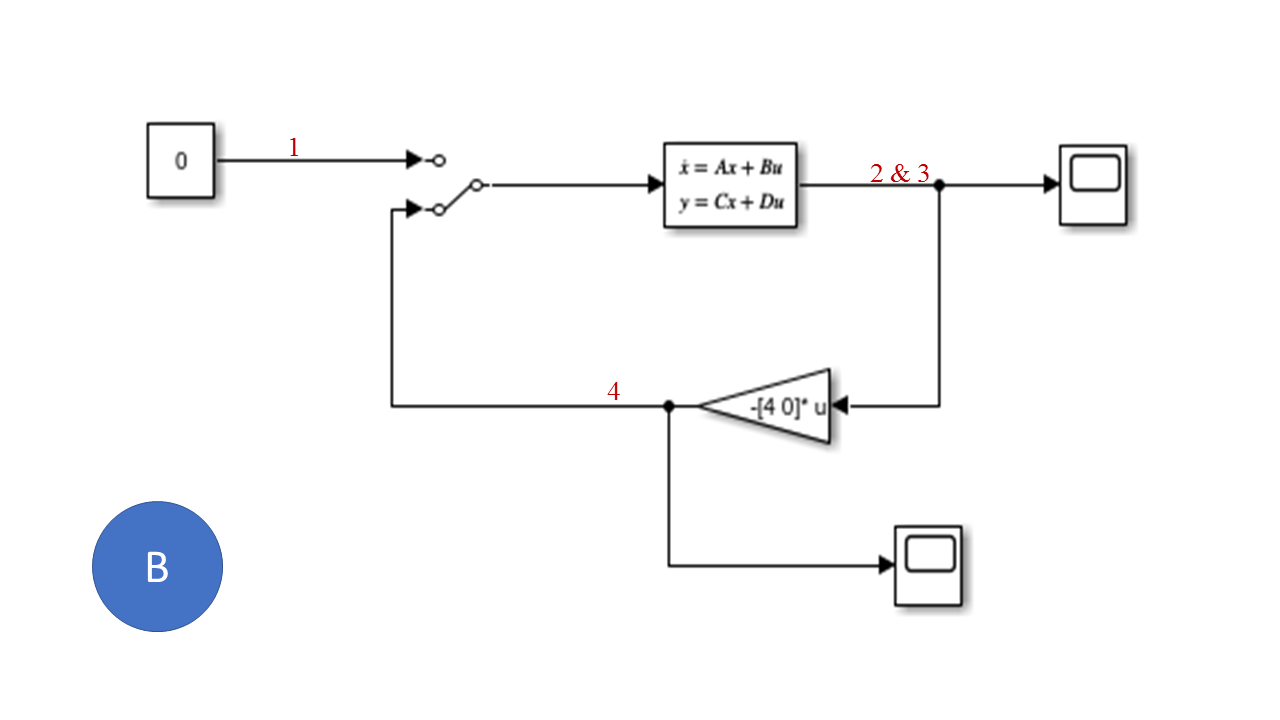

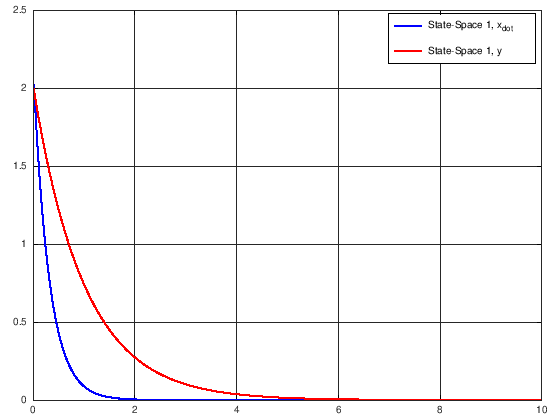

In [36]:
% Instance of the simulation schematic
sc5 = Schema(tini,tfinal,dt,nflows);

% List of components
c5{1} = Constant(1,0); %Just for reference for plotting graph, not being used here.
c5{2} = StateSpace(4,[2 3],A1,B1,C2,0,xo);
c5{3} = Gain([2 3],4,-[4 0]); 

sc5.AddListComponents(c5);

% Run the schematic and plot
out5 = sc5.Run([2 3 4]);
plot(out5(1,:),out5(2,:),'b','LineWidth',4, out5(1,:),out5(3,:),'r','LineWidth',4); %Output Signal 1 & 2
legend('State-Space 1, x_{dot}','State-Space 1, y')
grid on

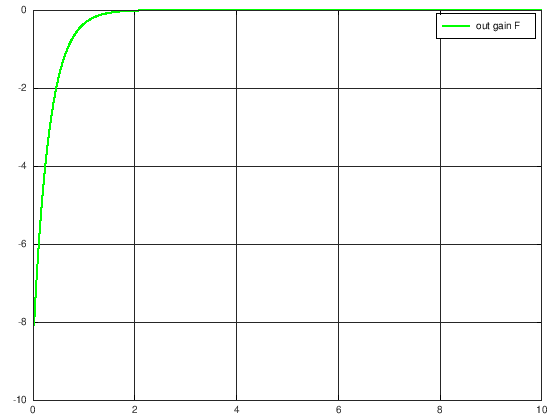

In [37]:
plot(out5(1,:),out5(4,:),'g','LineWidth',4); % Output_4
legend('out gain F')
grid on

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das System wurde durch Polplatzierung stabilisiert.

## <span style='color:Gray'>Beispiel #5 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das System aus <span style='color:Gray'>Beispiel #1</span>.




In [38]:
A = [1 1;-2 -1];

B = [0; 1];

C = [1 0];

D = 0;

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das charakteristische Polynom ist gegeben:
<br><br> $P(s)$ = $s^2$ + 2$\xi$$\omega_0$ +  $\omega_r$ $mit$ $\xi = 0,7$ $und$ $\omega_r=2$ 

Da $\xi = 0.7$ erhalten wir komplexe Pole. Mit $\omega_r$ wir die Geschwindigkeit des Systems einstellen. Die natürliche Frequenz  $\omega_0$ wird mit jeder Iteration um $2$ erhöht.

Steuerbarkeit des System
S_c =

   0   1
   1  -1

ans =  2
Eigenwerte
ans =

  -0.00000 + 1.00000i
  -0.00000 - 1.00000i

Regler
    place at line 139 column 20
    place at line 139 column 20


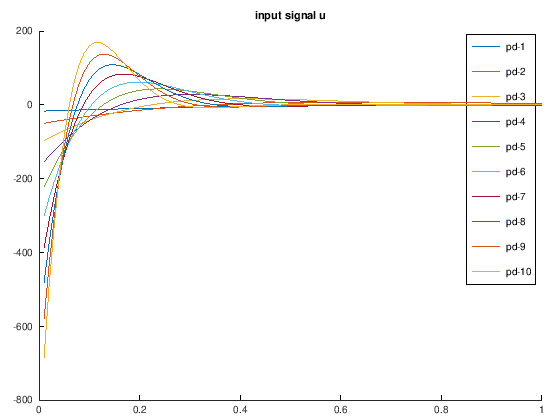

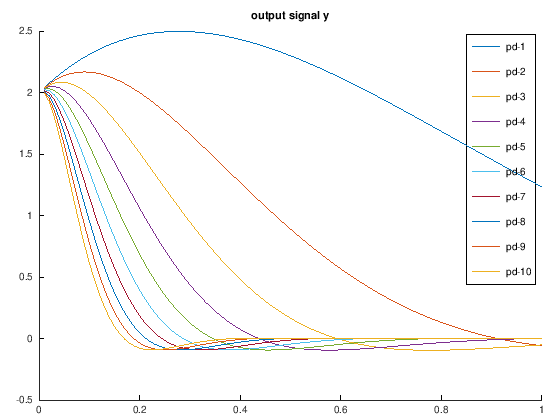

In [39]:
disp('Steuerbarkeit des System');
S_c = [B  A*B]
rank(S_c)

disp('Eigenwerte');
eigs(A)

disp('Regler');

csi = 0.7;
omr = 2;

for i=1:10
    omo = i*omr;
    pd = [-csi*omo+1j*omo*sqrt(1-csi*csi)  -csi*omo-1j*omo*sqrt(1-csi*csi)];
    F = place(A,B,pd);
    xini = [2; 2];
    Acl = A-B*F;
    
    deltat=0.01;
    for q=1:100
        y(i,q) = C*expm(Acl*deltat*q)*xini;
        u(i,q) = -F*expm(Acl*deltat*q)*xini;
    end
end

figure
hold on
for i=1:10
    plot((1:100)*deltat,u(i,:));
    
end
title('input signal u')
legStr = {'pd-1','pd-2','pd-3','pd-4','pd-5','pd-6','pd-7','pd-8','pd-9','pd-10'};
legend( legStr );

hold off
figure
hold on
for i=1:10
    plot((1:100)*deltat,y(i,:));
    
end
title('output signal y')
legStr = {'pd-1','pd-2','pd-3','pd-4','pd-5','pd-6','pd-7','pd-8','pd-9','pd-10'};
legend( legStr );
hold off

## <span style='color:Gray'>Beispiel #6 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das System aus <span style='color:Gray'>Beispiel #1</span>. Es gilt $T_s=0.1$.


In [40]:
A = [1 1; -2 -1];

B = [0; 1];

C = [1 0];

D = 0;

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Prüfe die Steuerbarkeit mittels Rang-Funktion:

In [41]:
disp('Steuerbarkeit des System');
S_c = [B  A*B]
rank(S_c)

Steuerbarkeit des System
S_c =

   0   1
   1  -1

ans =  2


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Ermittle Eigenwerte für den offenen Regelkreis:

In [42]:
disp('Eigenwerte');
eigs(A)

Eigenwerte
ans =

  -0.00000 + 1.00000i
  -0.00000 - 1.00000i



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gebe nun für den geschlossenen Regelkreis diese zwei Pole vor:

In [43]:
disp('Regler');
pd = [-3+1j*3  -3-1j*3]
F = place(A,B,pd)

Regler
pd =

  -3 + 3i  -3 - 3i

F =

   23.0000    6.0000



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Abtast:

In [44]:
Ts = 0.1;

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
    Die Regelstrecke soll diskretisiert werden. So erhalten wir <code>A_d</code> und <code>B_d</code>:

In [45]:
Ad = expm(A*Ts)
Bd = (Ad-eye(2))*inv(A)*B

Ad =

   1.094838   0.099833
  -0.199667   0.895171

Bd =

   0.0049958
   0.0948376



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die korrespondierenden (beliebigen) Pole im zeitdiskreten System lauten:

In [46]:
pdd = exp(pd.*Ts)

pdd =

   0.70773 + 0.21893i   0.70773 - 0.21893i



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
In diesem Fall wird dem Regler das diskrete Signal zugeführt:

In [47]:
Fd = place(Ad,Bd,pdd)

Fd =

   17.4834    5.1372



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Vergleicht man die Werte aus <span style='color:Gray'>Beispiel #1</span>, mit den Werten des diskretisierten Systems, ist
eine Abweichung zu erkennen, da $f^T$=[23  6] zuvor galt!
<br><br>Veranschaulichung durch Simulink:

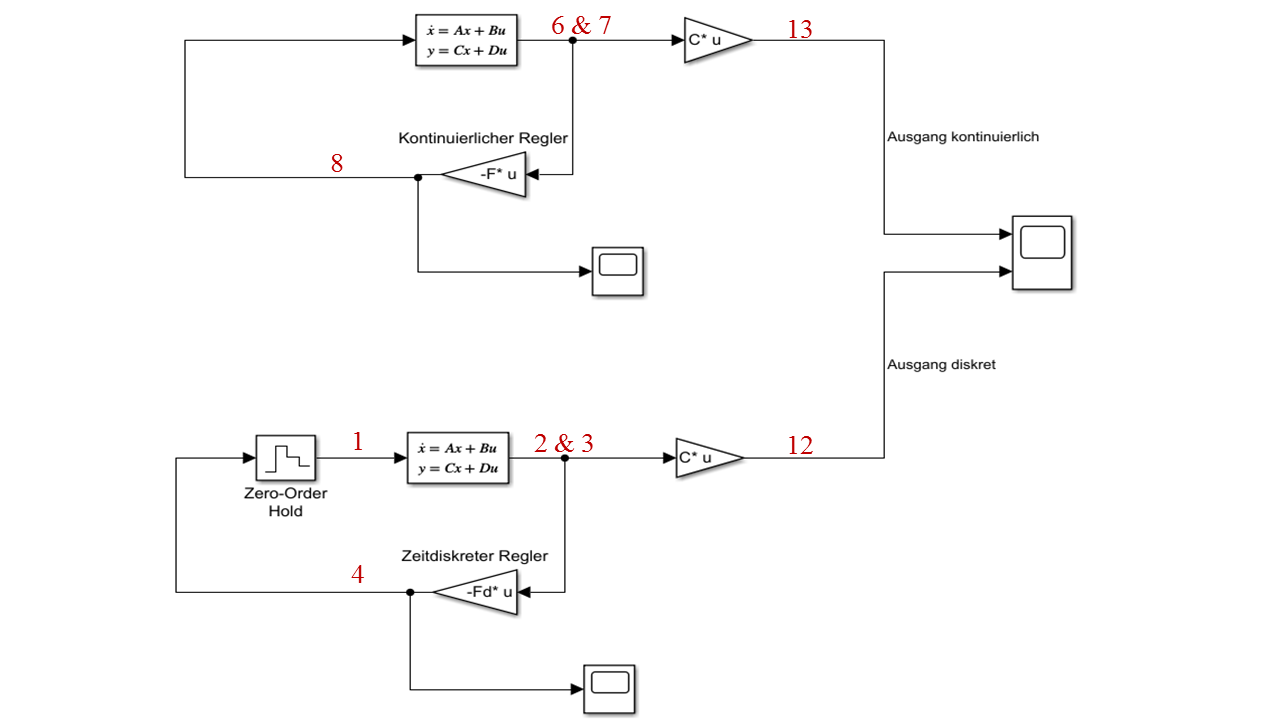

In [50]:
% Instance of the simulation schematic
nflowsd = 11;
tfinal = 4;
dt = 0.01;

C2 = eye(2);
sc6 = Schema(tini,tfinal,dt,nflowsd);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br> List of components:

In [51]:
c6{1} = StateSpace(1,[2 3],A,B,C2,D,xo);
c6{2} = Gain([2 3],4,-Fd);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br><span style='color:Orange'>Zero order hold (ZOH) Function Definition:</span>
<br><code>ZOH(1.argument = input_4, 2.argument = output_1, 3.argument = sample time )</code>

In [52]:
c6{3} = ZOH(4,1,Ts);

In [53]:
c6{4} = StateSpace(5,[6 7],A,B,C2,D,xo);
c6{5} = Gain([6 7],8,-F);
c6{6} = ZOH(8,5,Ts);
c6{7} = StateSpace(9,[10 11],A,B,C2,D,xo);
c6{8} = Gain([10 11],9,-F);
#c6{9} = Gain([2 3],12,[0 1]);
#c6{10} = Gain([6 7],13,[0 1]);

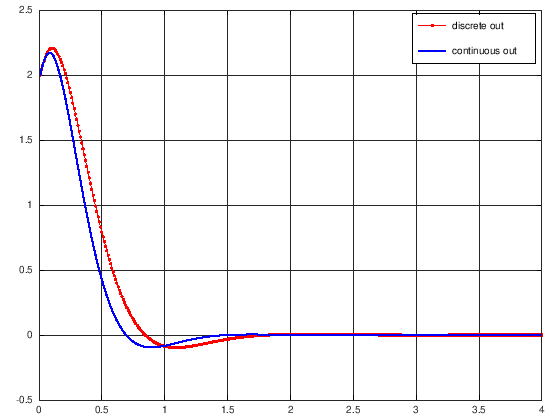

In [54]:
sc6.AddListComponents(c6);

% Run the schematic and plot
out6 = sc6.Run([2 6 10]);
plot(out6(1,:),out6(2,:),'.-r','LineWidth',3, out6(1,:),out6(3,:),'b','LineWidth',4);
legend('discrete out','continuous out')
grid on

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Je kleiner die Abtastzeit gewählt wird, desto kleiner wäre auch die Abweichung.
Höhere Abtastzeiten bedeuten jedoch einen höheren Rechenaufwand!

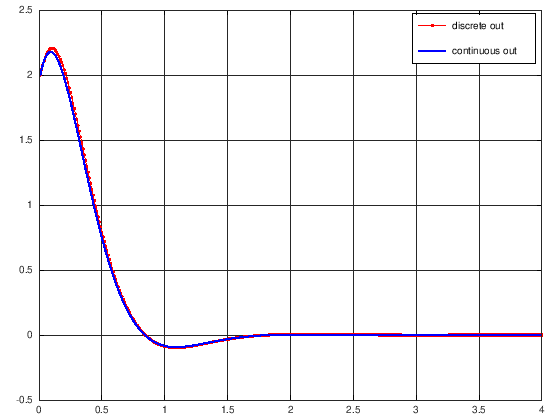

In [55]:
Ts2 = 0.01;

sc6.ChangeParameters(6,Ts2);

sc6.Reset();
out7 = sc6.Run([2 6]);
plot(out7(1,:),out7(2,:),'.-r','LineWidth',3,out7(1,:),out7(3,:),'b','LineWidth',4);
legend('discrete out','continuous out')
grid on

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das kontinuerliche System wird bei einer kleineren Abtastzeit $T_s=0.01$ hinreichend genau abgebildet.